# **MNIST classification with TensorFlow model**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, sys

workdir_path = '/content/drive/My Drive/Python/ICA/01_MNIST_tensorflow'
os.chdir(workdir_path)
sys.path.append(workdir_path)

In [0]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt     # only to show the images at end
from numpy.random import randint    # only to generate a random nuymber ar end
from numpy import argmax
import numpy as np


tf.reset_default_graph()

# load the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
tf.reset_default_graph()

sess=tf.Session()    
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('tensorflowModel.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'))

INFO:tensorflow:Restoring parameters from ./tensorflowModel.ckpt


In [0]:
graph = tf.get_default_graph()
input_node = graph.get_tensor_by_name('x_1:0')
input_2 = graph.get_tensor_by_name('keep_prob:0')
output_node = graph.get_tensor_by_name('Softmax:0')

529
prediction:  1
real value:  1


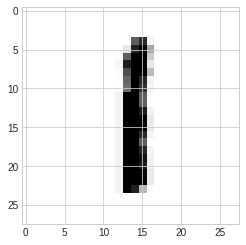

In [0]:
i=randint(1, mnist.test.images.shape[0])
print(i)
plt.imshow(mnist.test.images[i].reshape((28,28)), cmap='Greys')    #  cmap='Greys' to show as greyscale
print("prediction: ", argmax(sess.run('Softmax:0', feed_dict={'x_1:0': mnist.test.images[i:i+1], 'keep_prob:0': 1.0})))
print("real value: ", argmax(mnist.test.labels[i:i+1]))

In [0]:
runs=100

Average time [ms] for batch of 4  :  1.8648695945739746
Average time [ms] for batch of 8  :  1.9518709182739258
Average time [ms] for batch of 16  :  2.4586105346679688
Average time [ms] for batch of 32  :  2.832367420196533
Average time [ms] for batch of 64  :  3.3538246154785156
Average time [ms] for batch of 128  :  4.2055559158325195
Average time [ms] for batch of 256  :  7.0172858238220215

Average time/batch size [ms] for batch of 4  :  0.46621739864349365
Average time/batch size [ms] for batch of 8  :  0.24398386478424072
Average time/batch size [ms] for batch of 16  :  0.15366315841674805
Average time/batch size [ms] for batch of 32  :  0.08851148188114166
Average time/batch size [ms] for batch of 64  :  0.05240350961685181
Average time/batch size [ms] for batch of 128  :  0.03285590559244156
Average time/batch size [ms] for batch of 256  :  0.02741127274930477


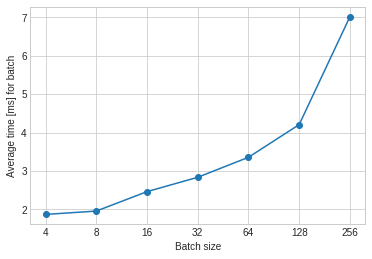

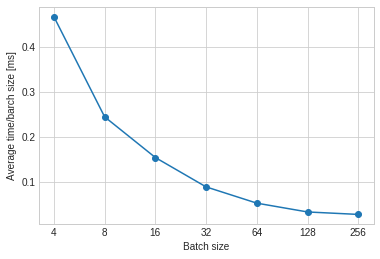

In [0]:
times_model=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: mnist.test.images[0:2**(i+2)], input_2: 1.0})
  end_time_one_batch=time.time()
  times_model[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_model[i,1]=times_model[i,1]/(2**(i+2))


# to plot***********************************************
x1=[0, 1, 2, 3, 4, 5, 6]
x2=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x1, times_model[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x1, my_xticks)

plt.figure()
plt.plot(x2, times_model[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x2, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_model[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_model[i,1])

In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))

 | 1.8649 | 1.9519 | 2.4586 | 2.8324 | 3.3538 | 4.2056 | 7.0173

 | 0.4662 | 0.2440 | 0.1537 | 0.0885 | 0.0524 | 0.0329 | 0.0274


frozen

In [0]:
def load_graph(frozen_graph_filename):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we import the graph_def into a new Graph and returns it 
    with tf.Graph().as_default() as graph:
        # The name var will prefix every op/nodes in your graph
        # Since we load everything in a new graph, this is not needed
        tf.import_graph_def(graph_def, name="prefix")
    return graph

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('tensorflowModel_graph_frozen.pb')

with graph.as_default():
  # We access the input and output nodes 
  input_node = graph.get_tensor_by_name('prefix/x_1:0')
  input_2 = graph.get_tensor_by_name('prefix/keep_prob:0')
  output_node = graph.get_tensor_by_name('prefix/Softmax:0')
      

Average time [ms] for batch of 4  :  2.5199508666992188
Average time [ms] for batch of 8  :  1.740572452545166
Average time [ms] for batch of 16  :  2.053372859954834
Average time [ms] for batch of 32  :  2.3174405097961426
Average time [ms] for batch of 64  :  3.0698394775390625
Average time [ms] for batch of 128  :  4.044013023376465
Average time [ms] for batch of 256  :  7.056524753570557

Average time/batch size [ms] for batch of 4  :  0.6299877166748047
Average time/batch size [ms] for batch of 8  :  0.21757155656814575
Average time/batch size [ms] for batch of 16  :  0.12833580374717712
Average time/batch size [ms] for batch of 32  :  0.07242001593112946
Average time/batch size [ms] for batch of 64  :  0.04796624183654785
Average time/batch size [ms] for batch of 128  :  0.03159385174512863
Average time/batch size [ms] for batch of 256  :  0.027564549818634987


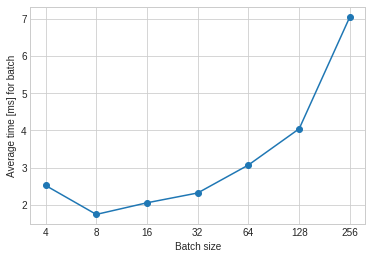

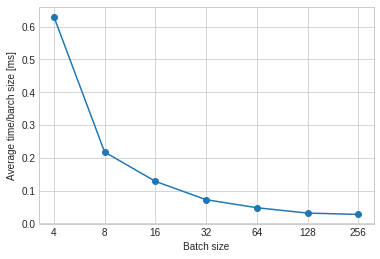

In [0]:
# We launch a Session
sess = tf.Session(graph=graph)

times_frozen=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: mnist.test.images[0:2**(i+2)], input_2: 1.0})
  end_time_one_batch=time.time()
  times_frozen[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_frozen[i,1]=times_frozen[i,1]/(2**(i+2))


# to plot***********************************************
x3=[0, 1, 2, 3, 4, 5, 6]
x4=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x3, times_frozen[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x3, my_xticks)

plt.figure()
plt.plot(x4, times_frozen[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x4, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_frozen[i,1])


In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))

 | 2.5200 | 1.7406 | 2.0534 | 2.3174 | 3.0698 | 4.0440 | 7.0565

 | 0.6300 | 0.2176 | 0.1283 | 0.0724 | 0.0480 | 0.0316 | 0.0276


Optimized

In [0]:
tf.reset_default_graph()

# We use our "load_graph" function
graph = load_graph('tensorflowModel_graph_optimized.pb')

with graph.as_default():
  # We access the input and output nodes 
  input_node = graph.get_tensor_by_name('prefix/x_1:0')
  input_2 = graph.get_tensor_by_name('prefix/keep_prob:0')
  output_node = graph.get_tensor_by_name('prefix/Softmax:0')

Average time [ms] for batch of 4  :  2.532198429107666
Average time [ms] for batch of 8  :  1.816866397857666
Average time [ms] for batch of 16  :  1.969141960144043
Average time [ms] for batch of 32  :  2.374753952026367
Average time [ms] for batch of 64  :  2.956254482269287
Average time [ms] for batch of 128  :  4.134762287139893
Average time [ms] for batch of 256  :  6.889746189117432

Average time/batch size [ms] for batch of 4  :  0.6330496072769165
Average time/batch size [ms] for batch of 8  :  0.22710829973220825
Average time/batch size [ms] for batch of 16  :  0.12307137250900269
Average time/batch size [ms] for batch of 32  :  0.07421106100082397
Average time/batch size [ms] for batch of 64  :  0.04619147628545761
Average time/batch size [ms] for batch of 128  :  0.03230283036828041
Average time/batch size [ms] for batch of 256  :  0.026913071051239967


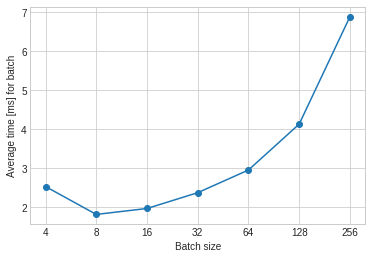

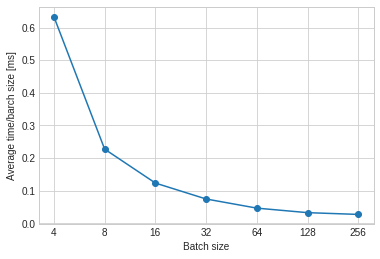

In [0]:
# We launch a Session
sess = tf.Session(graph=graph)

times_optimized=np.zeros((7,2))

for i in range(7):
  start_time_one_batch=time.time()
  for x in range(runs):
    sess.run(output_node, feed_dict={input_node: mnist.test.images[0:2**(i+2)], input_2: 1.0})
  end_time_one_batch=time.time()
  times_optimized[i,:]=((end_time_one_batch-start_time_one_batch)*1000/runs)   # *1000 to convert in ms and /runs to mean of 100 runs
  times_optimized[i,1]=times_optimized[i,1]/(2**(i+2))


# to plot***********************************************
x5=[0, 1, 2, 3, 4, 5, 6]
x6=[0, 1, 2, 3, 4, 5, 6]
plt.style.use('seaborn-whitegrid')

plt.plot(x5, times_optimized[:,0], marker='o')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x5, my_xticks)

plt.figure()
plt.plot(x6, times_optimized[:,1], marker='o')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x6, my_xticks)

for i in range(7):
  print('Average time [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,0])

print('')

for i in range(7):
  print('Average time/batch size [ms] for batch of',2**(i+2) ,' : ',times_optimized[i,1])


In [0]:
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print(" | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))

 | 2.5322 | 1.8169 | 1.9691 | 2.3748 | 2.9563 | 4.1348 | 6.8897

 | 0.6330 | 0.2271 | 0.1231 | 0.0742 | 0.0462 | 0.0323 | 0.0269


Comparison

Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 1.8649 | 1.9519 | 2.4586 | 2.8324 | 3.3538 | 4.2056 | 7.0173
Frozen | 2.5200 | 1.7406 | 2.0534 | 2.3174 | 3.0698 | 4.0440 | 7.0565
Optimized | 2.5322 | 1.8169 | 1.9691 | 2.3748 | 2.9563 | 4.1348 | 6.8897


Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256
--- | --- | --- | --- | --- | --- | --- | --- 
Model | 0.4662 | 0.2440 | 0.1537 | 0.0885 | 0.0524 | 0.0329 | 0.0274
Frozen | 0.6300 | 0.2176 | 0.1283 | 0.0724 | 0.0480 | 0.0316 | 0.0276
Optimized | 0.6330 | 0.2271 | 0.1231 | 0.0742 | 0.0462 | 0.0323 | 0.0269


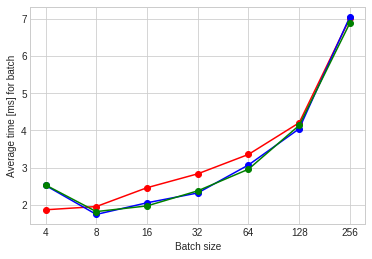

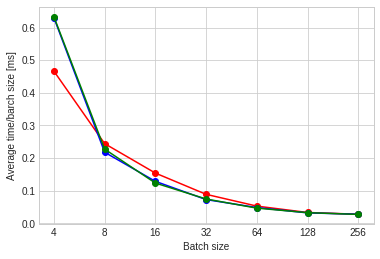

In [0]:
plt.plot(x5, times_model[:,0], marker='o', color='red')
plt.plot(x5, times_frozen[:,0], marker='o', color='blue')
plt.plot(x5, times_optimized[:,0], marker='o', color='green')
plt.ylabel('Average time [ms] for batch')
plt.xlabel('Batch size')
my_xticks = ['4', '8', '16', '32', '64', '128', '256']
plt.xticks(x5, my_xticks)

plt.figure()
plt.plot(x6, times_model[:,1], marker='o', color='red')
plt.plot(x6, times_frozen[:,1], marker='o', color='blue')
plt.plot(x6, times_optimized[:,1], marker='o', color='green')
plt.ylabel('Average time/barch size [ms]')
plt.xlabel('Batch size')
plt.xticks(x6, my_xticks)



print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,0], times_model[1,0], times_model[2,0], times_model[3,0], times_model[4,0], times_model[5,0], times_model[6,0]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,0], times_frozen[1,0], times_frozen[2,0], times_frozen[3,0], times_frozen[4,0], times_frozen[5,0], times_frozen[6,0]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,0], times_optimized[1,0], times_optimized[2,0], times_optimized[3,0], times_optimized[4,0], times_optimized[5,0], times_optimized[6,0]))
print('')
print('')
print("Time in ms | 4 | 8 | 16 | 32 | 64 | 128 | 256")
print("--- | --- | --- | --- | --- | --- | --- | --- ")
print("Model | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_model[0,1], times_model[1,1], times_model[2,1], times_model[3,1], times_model[4,1], times_model[5,1], times_model[6,1]))
print("Frozen | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_frozen[0,1], times_frozen[1,1], times_frozen[2,1], times_frozen[3,1], times_frozen[4,1], times_frozen[5,1], times_frozen[6,1]))
print("Optimized | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f | %.4f" % (times_optimized[0,1], times_optimized[1,1], times_optimized[2,1], times_optimized[3,1], times_optimized[4,1], times_optimized[5,1], times_optimized[6,1]))